Please consider the following before loading the data into R:  The data set has 191,096 rows and 18 columns. First calculate a rough estimate of how much memory the dataset will require in memory before reading into R. Make sure your computer has enough memory (most modern computer should be fine). 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport

import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("data_complaints.csv", parse_dates=['Date received'])

In [3]:
df

Date received                      Product                                 Sub-product                                              Issue                                          Sub-issue                       Consumer complaint narrative                            Company public response                                Company State ZIP code           Tags Consumer consent provided? Submitted via Date sent to company Company response to consumer Timely response?  Consumer disputed?  Complaint ID
0         2018-04-19  Credit card or prepaid card  General-purpose credit card or charge card                               Closing your account                           Can't close your account                                                NaN  Company has responded to the consumer and the ...                         CITIBANK, N.A.    AL    361XX           None       Consent not provided           Web             04/19/18      Closed with explanation              Yes                 NaN       2880655
1         2019-02-12  Credit card or prepaid card  General-purpose credit card or charge card    Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...  I initially in writing to Chase Bank in late X...                                               None                   JPMORGAN CHASE & CO.    CT    064XX           None           Consent provided           Web             02/12/19  Closed with monetary relief              Yes                 NaN       3149693
2         2018-04-12                     Mortgage                  Conventional home mortgage               Incorrect information on your report                                               None  My ex husband and myself had a mobile home ( H...  Company believes complaint is the result of an...                   Ditech Financial LLC    GA     None           None           Consent provided           Web             04/12/18      Closed with explanation              Yes                 NaN       2873888
3         2018-04-18                 Student loan              Federal student loan servicing                      Struggling to repay your loan             Problem lowering your monthly payments  I was a student at XXXX XXXX from XX/XX/XXXX-X...                                               None                Navient Solutions, LLC.    IN    463XX           None           Consent provided           Web             04/18/18      Closed with explanation              Yes                 NaN       2879448
4         2018-04-28  Credit card or prepaid card  General-purpose credit card or charge card                 Other features, terms, or problems                                      Other problem  It has come to my attention the CITI group is ...  Company has responded to the consumer and the ...                         CITIBANK, N.A.    MI    490XX           None           Consent provided           Web             04/28/18      Closed with explanation              Yes                 NaN       2890586
...              ...                          ...                                         ...                                                ...                                                ...                                                ...                                                ...                                    ...   ...      ...            ...                        ...           ...                  ...                          ...              ...                 ...           ...
191091    2018-11-30                     Mortgage                                FHA mortgage                              Closing on a mortgage                                               None                                                NaN                                               None  PRIMELENDING, A PLAINSCAPITAL COMPANY    FL    32503           None                        NaN         Phone             12/12/18      Closed wit

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191096 entries, 0 to 191095
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 191096 non-null  datetime64[ns]
 1   Product                       191096 non-null  object        
 2   Sub-product                   191096 non-null  object        
 3   Issue                         191096 non-null  object        
 4   Sub-issue                     191096 non-null  object        
 5   Consumer complaint narrative  90975 non-null   object        
 6   Company public response       191096 non-null  object        
 7   Company                       191096 non-null  object        
 8   State                         191096 non-null  object        
 9   ZIP code                      191096 non-null  object        
 10  Tags                          191096 non-null  object        
 11  Consumer cons

In [5]:
df.describe()

Consumer disputed?  Complaint ID
count                 0.0  1.910960e+05
mean                  NaN  3.242693e+06
std                   NaN  3.327868e+05
min                   NaN  2.702098e+06
25%                   NaN  2.954294e+06
50%                   NaN  3.219962e+06
75%                   NaN  3.517407e+06
max                   NaN  3.900135e+06

In [6]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID'], dtype='object')

Consider the column titled `Date received` and filter rows for all Student loan complaints received after January 1, 2018.  Count the number of student loan complaints received by each US state and rank in a decreasing order with the state with the most complaints at the top and the states with the least complaints at the bottom. 

In [7]:
df2 = df[df["Date received"] >= "2018-01-01"]

In [8]:
df2

Date received                      Product                                 Sub-product                                              Issue                                          Sub-issue                       Consumer complaint narrative                            Company public response                                Company State ZIP code           Tags Consumer consent provided? Submitted via Date sent to company Company response to consumer Timely response?  Consumer disputed?  Complaint ID
0         2018-04-19  Credit card or prepaid card  General-purpose credit card or charge card                               Closing your account                           Can't close your account                                                NaN  Company has responded to the consumer and the ...                         CITIBANK, N.A.    AL    361XX           None       Consent not provided           Web             04/19/18      Closed with explanation              Yes                 NaN       2880655
1         2019-02-12  Credit card or prepaid card  General-purpose credit card or charge card    Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...  I initially in writing to Chase Bank in late X...                                               None                   JPMORGAN CHASE & CO.    CT    064XX           None           Consent provided           Web             02/12/19  Closed with monetary relief              Yes                 NaN       3149693
2         2018-04-12                     Mortgage                  Conventional home mortgage               Incorrect information on your report                                               None  My ex husband and myself had a mobile home ( H...  Company believes complaint is the result of an...                   Ditech Financial LLC    GA     None           None           Consent provided           Web             04/12/18      Closed with explanation              Yes                 NaN       2873888
3         2018-04-18                 Student loan              Federal student loan servicing                      Struggling to repay your loan             Problem lowering your monthly payments  I was a student at XXXX XXXX from XX/XX/XXXX-X...                                               None                Navient Solutions, LLC.    IN    463XX           None           Consent provided           Web             04/18/18      Closed with explanation              Yes                 NaN       2879448
4         2018-04-28  Credit card or prepaid card  General-purpose credit card or charge card                 Other features, terms, or problems                                      Other problem  It has come to my attention the CITI group is ...  Company has responded to the consumer and the ...                         CITIBANK, N.A.    MI    490XX           None           Consent provided           Web             04/28/18      Closed with explanation              Yes                 NaN       2890586
...              ...                          ...                                         ...                                                ...                                                ...                                                ...                                                ...                                    ...   ...      ...            ...                        ...           ...                  ...                          ...              ...                 ...           ...
191091    2018-11-30                     Mortgage                                FHA mortgage                              Closing on a mortgage                                               None                                                NaN                                               None  PRIMELENDING, A PLAINSCAPITAL COMPANY    FL    32503           None                        NaN         Phone             12/12/18      Closed wit

In [9]:
df2["Date received"].value_counts()

2018-04-05    441
2018-04-06    406
2018-04-02    304
2020-04-23    294
2018-04-03    291
             ... 
2020-10-04     19
2019-04-21     19
2020-10-12     14
2020-10-11      9
2020-10-14      2
Name: Date received, Length: 1018, dtype: int64

In [10]:
df2.reset_index(inplace=True, drop=True)

In [11]:
df2

Date received                      Product                                 Sub-product                                              Issue                                          Sub-issue                       Consumer complaint narrative                            Company public response                                Company State ZIP code           Tags Consumer consent provided? Submitted via Date sent to company Company response to consumer Timely response?  Consumer disputed?  Complaint ID
0         2018-04-19  Credit card or prepaid card  General-purpose credit card or charge card                               Closing your account                           Can't close your account                                                NaN  Company has responded to the consumer and the ...                         CITIBANK, N.A.    AL    361XX           None       Consent not provided           Web             04/19/18      Closed with explanation              Yes                 NaN       2880655
1         2019-02-12  Credit card or prepaid card  General-purpose credit card or charge card    Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...  I initially in writing to Chase Bank in late X...                                               None                   JPMORGAN CHASE & CO.    CT    064XX           None           Consent provided           Web             02/12/19  Closed with monetary relief              Yes                 NaN       3149693
2         2018-04-12                     Mortgage                  Conventional home mortgage               Incorrect information on your report                                               None  My ex husband and myself had a mobile home ( H...  Company believes complaint is the result of an...                   Ditech Financial LLC    GA     None           None           Consent provided           Web             04/12/18      Closed with explanation              Yes                 NaN       2873888
3         2018-04-18                 Student loan              Federal student loan servicing                      Struggling to repay your loan             Problem lowering your monthly payments  I was a student at XXXX XXXX from XX/XX/XXXX-X...                                               None                Navient Solutions, LLC.    IN    463XX           None           Consent provided           Web             04/18/18      Closed with explanation              Yes                 NaN       2879448
4         2018-04-28  Credit card or prepaid card  General-purpose credit card or charge card                 Other features, terms, or problems                                      Other problem  It has come to my attention the CITI group is ...  Company has responded to the consumer and the ...                         CITIBANK, N.A.    MI    490XX           None           Consent provided           Web             04/28/18      Closed with explanation              Yes                 NaN       2890586
...              ...                          ...                                         ...                                                ...                                                ...                                                ...                                                ...                                    ...   ...      ...            ...                        ...           ...                  ...                          ...              ...                 ...           ...
177831    2018-11-30                     Mortgage                                FHA mortgage                              Closing on a mortgage                                               None                                                NaN                                               None  PRIMELENDING, A PLAINSCAPITAL COMPANY    FL    32503           None                        NaN         Phone             12/12/18      Closed wit

In [12]:
df2.groupby(by="State")["Product"].count().sort_values()

State
MH          1
AS          2
AA          7
FM         10
GU         18
        ...  
None     7902
TX      12191
NY      12662
FL      15926
CA      24836
Name: Product, Length: 62, dtype: int64

How many student loan complaints did the US state with third most complaints have?  

**12662**

Question 2

Complaints can be submitted in different ways to the CFPB. For example, someone can submit a complaint on the web, but they can also submit a complaint by phone. 

Consider all complaints that were **submitted by fax.** 

For this subset of complaints, what is the average amount of time between the complaint being received by CFPB (`Date received`) and the CFPB sending the complaint to the company (`Date sent to company`) ?  

R​ound to the nearest tenths digit. 

In [13]:
df2["Date sent to company"] = pd.to_datetime(df2["Date sent to company"])

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177836 entries, 0 to 177835
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 177836 non-null  datetime64[ns]
 1   Product                       177836 non-null  object        
 2   Sub-product                   177836 non-null  object        
 3   Issue                         177836 non-null  object        
 4   Sub-issue                     177836 non-null  object        
 5   Consumer complaint narrative  84419 non-null   object        
 6   Company public response       177836 non-null  object        
 7   Company                       177836 non-null  object        
 8   State                         177836 non-null  object        
 9   ZIP code                      177836 non-null  object        
 10  Tags                          177836 non-null  object        
 11  Consumer cons

In [15]:
df2.head()

Date received                      Product                                 Sub-product                                            Issue                                          Sub-issue                       Consumer complaint narrative                            Company public response                  Company State ZIP code  Tags Consumer consent provided? Submitted via Date sent to company Company response to consumer Timely response?  Consumer disputed?  Complaint ID
0    2018-04-19  Credit card or prepaid card  General-purpose credit card or charge card                             Closing your account                           Can't close your account                                                NaN  Company has responded to the consumer and the ...           CITIBANK, N.A.    AL    361XX  None       Consent not provided           Web           2018-04-19      Closed with explanation              Yes                 NaN       2880655
1    2019-02-12  Credit card or prepaid card  General-purpose credit card or charge card  Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...  I initially in writing to Chase Bank in late X...                                               None     JPMORGAN CHASE & CO.    CT    064XX  None           Consent provided           Web           2019-02-12  Closed with monetary relief              Yes                 NaN       3149693
2    2018-04-12                     Mortgage                  Conventional home mortgage             Incorrect information on your report                                               None  My ex husband and myself had a mobile home ( H...  Company believes complaint is the result of an...     Ditech Financial LLC    GA     None  None           Consent provided           Web           2018-04-12      Closed with explanation              Yes                 NaN       2873888
3    2018-04-18                 Student loan              Federal student loan servicing                    Struggling to repay your loan             Problem lowering your monthly payments  I was a student at XXXX XXXX from XX/XX/XXXX-X...                                               None  Navient Solutions, LLC.    IN    463XX  None           Consent provided           Web           2018-04-18      Closed with explanation              Yes                 NaN       2879448
4    2018-04-28  Credit card or prepaid card  General-purpose credit card or charge card               Other features, terms, or problems                                      Other problem  It has come to my attention the CITI group is ...  Company has responded to the consumer and the ...           CITIBANK, N.A.    MI    490XX  None           Consent provided           Web           2018-04-28      Closed with explanation              Yes                 NaN       2890586

In [16]:
df2["Submitted via"].value_counts()

Web            131233
Referral        22287
Phone           16292
Postal mail      6674
Fax              1330
Email              20
Name: Submitted via, dtype: int64

In [17]:
df3 = df2[df2["Submitted via"] == "Fax"]

In [18]:
df3.head()

Date received                      Product                                 Sub-product                                            Issue                                          Sub-issue Consumer complaint narrative                            Company public response                   Company State ZIP code  Tags Consumer consent provided? Submitted via Date sent to company     Company response to consumer Timely response?  Consumer disputed?  Complaint ID
6      2018-02-27                     Mortgage                  Conventional home mortgage                   Trouble during payment process                                               None                          NaN                                               None       NATIONSTAR MORTGAGE    FL    34677  None                        NaN           Fax           2018-05-07          Closed with explanation              Yes                 NaN       2827033
34     2018-03-06  Credit card or prepaid card  General-purpose credit card or charge card  Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...                          NaN                                               None  AMERICAN EXPRESS COMPANY    PA    19116  None                        NaN           Fax           2018-03-06          Closed with explanation              Yes                 NaN       2834930
56     2018-06-08  Credit card or prepaid card  General-purpose credit card or charge card  Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...                          NaN  Company has responded to the consumer and the ...       SYNCHRONY FINANCIAL    FL    33125  None                        NaN           Fax           2018-06-08  Closed with non-monetary relief              Yes                 NaN       2930754
235    2019-04-01                     Mortgage                      Other type of mortgage                            Closing on a mortgage                                               None                          NaN  Company has responded to the consumer and the ...            CITIBANK, N.A.  None     None  None                        NaN           Fax           2019-04-04          Closed with explanation              Yes                 NaN       3197461
317    2019-05-01  Credit card or prepaid card  General-purpose credit card or charge card  Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...                          NaN                                               None      JPMORGAN CHASE & CO.    NC    28120  None                        NaN           Fax           2019-05-01          Closed with explanation              Yes                 NaN       3229564

In [19]:
df3["timediff"] = df3["Date sent to company"] - df3["Date received"]

In [20]:
df3.head()

Date received                      Product                                 Sub-product                                            Issue                                          Sub-issue Consumer complaint narrative                            Company public response                   Company State ZIP code  Tags Consumer consent provided? Submitted via Date sent to company     Company response to consumer Timely response?  Consumer disputed?  Complaint ID timediff
6      2018-02-27                     Mortgage                  Conventional home mortgage                   Trouble during payment process                                               None                          NaN                                               None       NATIONSTAR MORTGAGE    FL    34677  None                        NaN           Fax           2018-05-07          Closed with explanation              Yes                 NaN       2827033  69 days
34     2018-03-06  Credit card or prepaid card  General-purpose credit card or charge card  Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...                          NaN                                               None  AMERICAN EXPRESS COMPANY    PA    19116  None                        NaN           Fax           2018-03-06          Closed with explanation              Yes                 NaN       2834930   0 days
56     2018-06-08  Credit card or prepaid card  General-purpose credit card or charge card  Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...                          NaN  Company has responded to the consumer and the ...       SYNCHRONY FINANCIAL    FL    33125  None                        NaN           Fax           2018-06-08  Closed with non-monetary relief              Yes                 NaN       2930754   0 days
235    2019-04-01                     Mortgage                      Other type of mortgage                            Closing on a mortgage                                               None                          NaN  Company has responded to the consumer and the ...            CITIBANK, N.A.  None     None  None                        NaN           Fax           2019-04-04          Closed with explanation              Yes                 NaN       3197461   3 days
317    2019-05-01  Credit card or prepaid card  General-purpose credit card or charge card  Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...                          NaN                                               None      JPMORGAN CHASE & CO.    NC    28120  None                        NaN           Fax           2019-05-01          Closed with explanation              Yes                 NaN       3229564   0 days

In [21]:
type(df3["timediff"])

pandas.core.series.Series

In [22]:
df3["days"] = df3["timediff"].dt.days

In [23]:
df3.head()

Date received                      Product                                 Sub-product                                            Issue                                          Sub-issue Consumer complaint narrative                            Company public response                   Company State ZIP code  Tags Consumer consent provided? Submitted via Date sent to company     Company response to consumer Timely response?  Consumer disputed?  Complaint ID timediff  days
6      2018-02-27                     Mortgage                  Conventional home mortgage                   Trouble during payment process                                               None                          NaN                                               None       NATIONSTAR MORTGAGE    FL    34677  None                        NaN           Fax           2018-05-07          Closed with explanation              Yes                 NaN       2827033  69 days    69
34     2018-03-06  Credit card or prepaid card  General-purpose credit card or charge card  Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...                          NaN                                               None  AMERICAN EXPRESS COMPANY    PA    19116  None                        NaN           Fax           2018-03-06          Closed with explanation              Yes                 NaN       2834930   0 days     0
56     2018-06-08  Credit card or prepaid card  General-purpose credit card or charge card  Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...                          NaN  Company has responded to the consumer and the ...       SYNCHRONY FINANCIAL    FL    33125  None                        NaN           Fax           2018-06-08  Closed with non-monetary relief              Yes                 NaN       2930754   0 days     0
235    2019-04-01                     Mortgage                      Other type of mortgage                            Closing on a mortgage                                               None                          NaN  Company has responded to the consumer and the ...            CITIBANK, N.A.  None     None  None                        NaN           Fax           2019-04-04          Closed with explanation              Yes                 NaN       3197461   3 days     3
317    2019-05-01  Credit card or prepaid card  General-purpose credit card or charge card  Problem with a purchase shown on your statement  Credit card company isn't resolving a dispute ...                          NaN                                               None      JPMORGAN CHASE & CO.    NC    28120  None                        NaN           Fax           2019-05-01          Closed with explanation              Yes                 NaN       3229564   0 days     0

In [24]:
df3["days"].mean()

1.6203007518796992

Consider all **Student loan** complaints.  

How many times does the string "student" appear in the string of text in the `Consumer complaint narrative` column?

In [25]:
df["Product"].value_counts()

Credit card or prepaid card    80626
Mortgage                       71361
Student loan                   21383
Vehicle loan or lease          17726
Name: Product, dtype: int64

In [26]:
df4 = df[df["Product"] == "Student loan"]
df4.head()

Date received       Product                     Sub-product                                 Issue                                    Sub-issue                       Consumer complaint narrative                            Company public response                  Company State ZIP code  Tags Consumer consent provided? Submitted via Date sent to company     Company response to consumer Timely response?  Consumer disputed?  Complaint ID
3     2018-04-18  Student loan  Federal student loan servicing         Struggling to repay your loan       Problem lowering your monthly payments  I was a student at XXXX XXXX from XX/XX/XXXX-X...                                               None  Navient Solutions, LLC.    IN    463XX  None           Consent provided           Web             04/18/18          Closed with explanation              Yes                 NaN       2879448
17    2018-04-24  Student loan  Federal student loan servicing  Dealing with your lender or servicer  Trouble with how payments are being handled  My student loans are currently being services ...                                               None                AES/PHEAA    NY     None  None           Consent provided           Web             04/24/18  Closed with non-monetary relief              Yes                 NaN       2886272
26    2018-05-23  Student loan  Federal student loan servicing  Dealing with your lender or servicer     Received bad information about your loan                                                NaN                                               None  Navient Solutions, LLC.  None     None  None                        NaN         Phone             05/23/18          Closed with explanation              Yes                 NaN       2915606
32    2019-03-13  Student loan            Private student loan  Incorrect information on your report                Account information incorrect                                                NaN  Company has responded to the consumer and the ...    WELLS FARGO & COMPANY    GA    30076  None       Consent not provided           Web             03/13/19      Closed with monetary relief              Yes                 NaN       3178756
45    2019-03-07  Student loan  Federal student loan servicing  Dealing with your lender or servicer  Trouble with how payments are being handled  From to XXXX to XXXX I was not enrolled in an ...                                               None  Navient Solutions, LLC.    IN     None  None           Consent provided           Web             03/07/19          Closed with explanation              Yes                 NaN       3172495

In [27]:
df4["Consumer complaint narrative"].str.contains("student").value_counts()

False    6737
True     5748
Name: Consumer complaint narrative, dtype: int64

Consider only **Mortgage** complaints. 

The `Issue` column contains a set of plain text categorical variables that the consumer identified in the complaint. For example, one type of issue is "Trouble during payment process" for **Mortgage** complaints.  

For each `Issue`, calculate what is the average length of characters in the string text in the `Consumer complaint narrative` column. 

Which `Issue` has the longest complaint length on average?

In [28]:
df5 = df[df["Product"] == "Mortgage"]

In [29]:
df5.head()

Date received   Product                 Sub-product                                 Issue Sub-issue                       Consumer complaint narrative                            Company public response               Company State ZIP code            Tags Consumer consent provided? Submitted via Date sent to company Company response to consumer Timely response?  Consumer disputed?  Complaint ID
2     2018-04-12  Mortgage  Conventional home mortgage  Incorrect information on your report      None  My ex husband and myself had a mobile home ( H...  Company believes complaint is the result of an...  Ditech Financial LLC    GA     None            None           Consent provided           Web             04/12/18      Closed with explanation              Yes                 NaN       2873888
5     2017-11-20  Mortgage      Other type of mortgage            Struggling to pay mortgage      None                                                NaN                                               None  JPMORGAN CHASE & CO.    SC    29707            None                        NaN   Postal mail             11/20/17      Closed with explanation              Yes                 NaN       2733737
7     2018-02-27  Mortgage  Conventional home mortgage        Trouble during payment process      None                                                NaN                                               None   NATIONSTAR MORTGAGE    FL    34677            None                        NaN           Fax             05/07/18      Closed with explanation              Yes                 NaN       2827033
9     2018-04-09  Mortgage      Other type of mortgage        Trouble during payment process      None                                                NaN  Company has responded to the consumer and the ...  M&T BANK CORPORATION    MD    20746            None                        NaN      Referral             04/10/18      Closed with explanation              Yes                 NaN       2871245
13    2020-02-05  Mortgage      Other type of mortgage        Trouble during payment process      None  In XX/XX/2019, I refinanced my office building...  Company has responded to the consumer and the ...          U.S. BANCORP    CA    926XX  Older American           Consent provided           Web             02/05/20      Closed with explanation              Yes                 NaN       3520298

In [30]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71361 entries, 2 to 191095
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 71361 non-null  datetime64[ns]
 1   Product                       71361 non-null  object        
 2   Sub-product                   71361 non-null  object        
 3   Issue                         71361 non-null  object        
 4   Sub-issue                     71361 non-null  object        
 5   Consumer complaint narrative  30957 non-null  object        
 6   Company public response       71361 non-null  object        
 7   Company                       71361 non-null  object        
 8   State                         71361 non-null  object        
 9   ZIP code                      71361 non-null  object        
 10  Tags                          71361 non-null  object        
 11  Consumer consent provided? 

In [31]:
df5["stringlength"] = df5["Consumer complaint narrative"].str.len()

In [32]:
df5.head()

Date received   Product                 Sub-product                                 Issue Sub-issue                       Consumer complaint narrative                            Company public response               Company State ZIP code            Tags Consumer consent provided? Submitted via Date sent to company Company response to consumer Timely response?  Consumer disputed?  Complaint ID  stringlength
2     2018-04-12  Mortgage  Conventional home mortgage  Incorrect information on your report      None  My ex husband and myself had a mobile home ( H...  Company believes complaint is the result of an...  Ditech Financial LLC    GA     None            None           Consent provided           Web             04/12/18      Closed with explanation              Yes                 NaN       2873888        2656.0
5     2017-11-20  Mortgage      Other type of mortgage            Struggling to pay mortgage      None                                                NaN                                               None  JPMORGAN CHASE & CO.    SC    29707            None                        NaN   Postal mail             11/20/17      Closed with explanation              Yes                 NaN       2733737           NaN
7     2018-02-27  Mortgage  Conventional home mortgage        Trouble during payment process      None                                                NaN                                               None   NATIONSTAR MORTGAGE    FL    34677            None                        NaN           Fax             05/07/18      Closed with explanation              Yes                 NaN       2827033           NaN
9     2018-04-09  Mortgage      Other type of mortgage        Trouble during payment process      None                                                NaN  Company has responded to the consumer and the ...  M&T BANK CORPORATION    MD    20746            None                        NaN      Referral             04/10/18      Closed with explanation              Yes                 NaN       2871245           NaN
13    2020-02-05  Mortgage      Other type of mortgage        Trouble during payment process      None  In XX/XX/2019, I refinanced my office building...  Company has responded to the consumer and the ...          U.S. BANCORP    CA    926XX  Older American           Consent provided           Web             02/05/20      Closed with explanation              Yes                 NaN       3520298        1472.0

In [33]:
df5["stringlength"].mean()

1799.6222502180444

In [34]:
df5["stringlength"].max()

32317.0

In [35]:
df5.groupby(by='Issue')["stringlength"].mean()

Issue
Applying for a mortgage or refinancing an existing mortgage                         1777.399950
Closing on a mortgage                                                               2006.365764
Credit monitoring or identity theft protection services                             1236.684211
Improper use of your report                                                          890.000000
Incorrect information on your report                                                1150.030645
Problem with a credit reporting company's investigation into an existing problem    1232.165441
Problem with fraud alerts or security freezes                                        656.600000
Struggling to pay mortgage                                                          1960.824256
Trouble during payment process                                                      1718.789445
Unable to get your credit report or credit score                                    1563.529412
Name: stringlength, dtype: float64

Consider only **Vehicle loan or lease complaints**. Consider the two columns `Product` and `Consumer complaint narrative`.

For the string text in the `Consumer complaint narrative` column, drop any rows with `NA` in the column and remove any strings such as "XX", "XXX", "XXXX" in the complaint.

Transform this data frame with two columns into a data frame with three columns (`Product`, `id_number`, and `word`)  where the text in the `Consumer complaint narrative` column gets converted into a format where each row corresponds to one word of the complaint (`word`) while also keeping track of which complaint we are working with (`id_number)`. 

Remove any stop words.   

What are the top three most frequently used words for this type of complaint?  

In [36]:
df["Product"].unique()

array(['Credit card or prepaid card', 'Mortgage', 'Student loan',
       'Vehicle loan or lease'], dtype=object)

In [37]:
df6 = df[df["Product"] == "Vehicle loan or lease"]

In [38]:
df6.head()

Date received                Product Sub-product                                 Issue                                    Sub-issue                       Consumer complaint narrative                            Company public response                                Company State ZIP code  Tags Consumer consent provided? Submitted via Date sent to company     Company response to consumer Timely response?  Consumer disputed?  Complaint ID
10    2018-04-10  Vehicle loan or lease        Loan            Managing the loan or lease                              Billing problem  Complaint : Charged {$10.00} Finance fee for m...  Company has responded to the consumer and the ...  BANK OF AMERICA, NATIONAL ASSOCIATION    WA    980XX  None           Consent provided           Web             04/10/18  Closed with non-monetary relief              Yes                 NaN       2869995
14    2018-04-10  Vehicle loan or lease        Loan  Incorrect information on your report                     Account status incorrect  I began a vehicle loan with Credit Acceptance ...  Company has responded to the consumer and the ...          CREDIT ACCEPTANCE CORPORATION    VA    238XX  None           Consent provided           Web             04/10/18          Closed with explanation              Yes                 NaN       2869579
33    2018-04-20  Vehicle loan or lease        Loan            Managing the loan or lease               Problem with the interest rate                                                NaN  Company has responded to the consumer and the ...                  WELLS FARGO & COMPANY    CA    95501  None       Consent not provided           Web             04/20/18          Closed with explanation              Yes                 NaN       2882335
34    2018-02-27  Vehicle loan or lease       Lease            Managing the loan or lease                    Problem with fees charged  This is the letter we just mailed to ALLY Fina...  Company has responded to the consumer and the ...                    ALLY FINANCIAL INC.    CA     None  None           Consent provided           Web             02/27/18          Closed with explanation              Yes                 NaN       2827410
36    2018-04-04  Vehicle loan or lease        Loan            Managing the loan or lease  Loan sold or transferred to another company                                                NaN                                               None                    CONDOR CAPITAL CORP    NY    117XX  None                        NaN      Referral             04/19/18                Untimely response               No                 NaN       2880944

In [39]:
df7 = df6[["Product","Consumer complaint narrative"]]

In [40]:
df7

Product                       Consumer complaint narrative
10      Vehicle loan or lease  Complaint : Charged {$10.00} Finance fee for m...
14      Vehicle loan or lease  I began a vehicle loan with Credit Acceptance ...
33      Vehicle loan or lease                                                NaN
34      Vehicle loan or lease  This is the letter we just mailed to ALLY Fina...
36      Vehicle loan or lease                                                NaN
...                       ...                                                ...
191073  Vehicle loan or lease                                                NaN
191077  Vehicle loan or lease                                                NaN
191080  Vehicle loan or lease                                                NaN
191086  Vehicle loan or lease                                                NaN
191093  Vehicle loan or lease                                                NaN

[17726 rows x 2 columns]

In [41]:
df7.isnull().sum()

Product                            0
Consumer complaint narrative    8487
dtype: int64

In [42]:
df7.dropna(inplace=True)

In [43]:
df7

Product                       Consumer complaint narrative
10      Vehicle loan or lease  Complaint : Charged {$10.00} Finance fee for m...
14      Vehicle loan or lease  I began a vehicle loan with Credit Acceptance ...
34      Vehicle loan or lease  This is the letter we just mailed to ALLY Fina...
147     Vehicle loan or lease  There were two issues that occurred with GM Fi...
169     Vehicle loan or lease  I surrendered my car two years ago because of ...
...                       ...                                                ...
190976  Vehicle loan or lease  XX/XX/2018 I entered into a deferment plan wit...
190986  Vehicle loan or lease  in XXXX of XXXX I purchased a XXXX XXXX XXXX, ...
191009  Vehicle loan or lease  The vehicle was purchased on XX/XX/XXXX. On XX...
191010  Vehicle loan or lease  On XX/XX/2017 I leased from XXXX in Indiana, p...
191034  Vehicle loan or lease  I sent a letter to XXXX  in XXXX, with signatu...

[9239 rows x 2 columns]

In [44]:
df7["Consumer complaint narrative"] = df7["Consumer complaint narrative"].str.replace("XX","")

In [45]:
df7["Consumer complaint narrative"] = df7["Consumer complaint narrative"].str.replace("XXX","")

In [46]:
df7["Consumer complaint narrative"] = df7["Consumer complaint narrative"].str.replace("XXXX","")

In [47]:
df7

Product                       Consumer complaint narrative
10      Vehicle loan or lease  Complaint : Charged {$10.00} Finance fee for m...
14      Vehicle loan or lease  I began a vehicle loan with Credit Acceptance ...
34      Vehicle loan or lease  This is the letter we just mailed to ALLY Fina...
147     Vehicle loan or lease  There were two issues that occurred with GM Fi...
169     Vehicle loan or lease  I surrendered my car two years ago because of ...
...                       ...                                                ...
190976  Vehicle loan or lease  //2018 I entered into a deferment plan with fi...
190986  Vehicle loan or lease  in  of  I purchased a   , at the time they sol...
191009  Vehicle loan or lease  The vehicle was purchased on //. On // i recei...
191010  Vehicle loan or lease  On //2017 I leased from  in Indiana, paid the ...
191034  Vehicle loan or lease  I sent a letter to   in , with signature confi...

[9239 rows x 2 columns]

In [48]:
df7.reset_index(inplace=True, drop=True)

In [49]:
df7

Product                       Consumer complaint narrative
0     Vehicle loan or lease  Complaint : Charged {$10.00} Finance fee for m...
1     Vehicle loan or lease  I began a vehicle loan with Credit Acceptance ...
2     Vehicle loan or lease  This is the letter we just mailed to ALLY Fina...
3     Vehicle loan or lease  There were two issues that occurred with GM Fi...
4     Vehicle loan or lease  I surrendered my car two years ago because of ...
...                     ...                                                ...
9234  Vehicle loan or lease  //2018 I entered into a deferment plan with fi...
9235  Vehicle loan or lease  in  of  I purchased a   , at the time they sol...
9236  Vehicle loan or lease  The vehicle was purchased on //. On // i recei...
9237  Vehicle loan or lease  On //2017 I leased from  in Indiana, paid the ...
9238  Vehicle loan or lease  I sent a letter to   in , with signature confi...

[9239 rows x 2 columns]

In [50]:
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [51]:
len(stopwords)

326

In [52]:
x = df7["Consumer complaint narrative"]

In [53]:
x

0       Complaint : Charged {$10.00} Finance fee for m...
1       I began a vehicle loan with Credit Acceptance ...
2       This is the letter we just mailed to ALLY Fina...
3       There were two issues that occurred with GM Fi...
4       I surrendered my car two years ago because of ...
                              ...                        
9234    //2018 I entered into a deferment plan with fi...
9235    in  of  I purchased a   , at the time they sol...
9236    The vehicle was purchased on //. On // i recei...
9237    On //2017 I leased from  in Indiana, paid the ...
9238    I sent a letter to   in , with signature confi...
Name: Consumer complaint narrative, Length: 9239, dtype: object

In [54]:
df7['no_stop'] = df7['Consumer complaint narrative'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [55]:
df7

Product                       Consumer complaint narrative                                            no_stop
0     Vehicle loan or lease  Complaint : Charged {$10.00} Finance fee for m...  Complaint : Charged {$10.00} Finance fee makin...
1     Vehicle loan or lease  I began a vehicle loan with Credit Acceptance ...  I began vehicle loan Credit Acceptance around/...
2     Vehicle loan or lease  This is the letter we just mailed to ALLY Fina...  This letter mailed ALLY Financial. As I typing...
3     Vehicle loan or lease  There were two issues that occurred with GM Fi...  There issues occurred GM Financial. I contact ...
4     Vehicle loan or lease  I surrendered my car two years ago because of ...  I surrendered car years ago hardship. I paymen...
...                     ...                                                ...                                                ...
9234  Vehicle loan or lease  //2018 I entered into a deferment plan with fi...  //2018 I entered deferment plan finance compan...
9235  Vehicle loan or lease  in  of  I purchased a   , at the time they sol...  I purchased , time sold extended warranty cont...
9236  Vehicle loan or lease  The vehicle was purchased on //. On // i recei...  The vehicle purchased //. On // received regar...
9237  Vehicle loan or lease  On //2017 I leased from  in Indiana, paid the ...  On //2017 I leased Indiana, paid payment, addi...
9238  Vehicle loan or lease  I sent a letter to   in , with signature confi...  I sent letter , signature confirmation receive...

[9239 rows x 3 columns]

In [56]:
from wordcloud import WordCloud

In [57]:
text = ' '.join(df7["no_stop"])

In [58]:
text

'Complaint : Charged {$10.00} Finance fee making principal Payment Account : Bank America I mailed {$300.00} check B A principal payment. On // payment posted parts. A principal payment {$250.00} ; payment {$50.00} {$40.00} applied principal {$10.00} finance charge. The instruction stated principal payment. My previous payment {$440.00} posted // regular payment P & I. * // contacted B A online bank secure message outlining problem * // received response * // responded problem easy fix, need * // representative ( stated ) called me, identified BofA, started ask personal identifying information ( I refused answer called ) stated help I provided personal information. I refused told credit finance fee. They hung up. I began vehicle loan Credit Acceptance around//. I missed late payment. At start agreement, dealership setup account Credit Acceptance auto pay ; The dealer entered incorrect account numbers. I called credit acceptance consistently 1 week find money withdrawn checking account.

In [59]:
len(text)

7559876

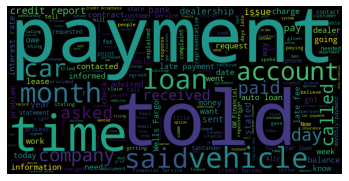

In [60]:
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()